In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, time

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("spam-datasset.csv", index_col=False, squeeze=True)

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.groupby('Category')['Message'].count()

Category
ham     4825
spam     747
Name: Message, dtype: int64

In [6]:
def processMessage(row, attr):
    message = re.sub('[^A-Za-z]+', ' ', row[attr])
    message = message.lower()
    return message

In [7]:
df["Message"] = df.apply (lambda row: processMessage(row, "Message"), axis=1)
df

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the nd time we have tried contact u u ...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [16]:
lista_stopword = open("stopwords.txt", "r").readlines()
lista_stopword = [stopword.replace('\n', '') for stopword in lista_stopword]
#lista_stopword
#from nltk.corpus import stopwords
#stop = stopwords.words('english')

In [17]:
df["Message"] =  df["Message"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in lista_stopword))
df

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,dun say early hor c already say
4,ham,nah don t think goes usf lives around though
...,...,...
5567,spam,nd time tried contact won pound prize claim ea...
5568,ham,will b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like d interested buying so...


In [34]:
# Cria a matriz de features bag of words
from sklearn.feature_extraction.text import CountVectorizer
#countTransformer = CountVectorizer()
countTransformer = CountVectorizer(stop_words='english')
bag_of_words = countTransformer.fit_transform(df['Message'])

bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
feature_names = countTransformer.get_feature_names()
#feature_names[0:100]

In [25]:
bg_df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
bg_df

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
def classifier(X_train,X_test,Y_train,Y_test, model):    
    ini = time.time() #Inicio do calculo do tempo

    model.fit(X_train,Y_train)

    end = time.time()
    dtc_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,model.predict(X_test)))

    return model

In [35]:
df.Category = df.Category.map({'ham': 0, 'spam': 1})
df

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,dun say early hor c already say
4,0,nah don t think goes usf lives around though
...,...,...
5567,1,nd time tried contact won pound prize claim ea...
5568,0,will b going esplanade fr home
5569,0,pity mood suggestions
5570,0,guy bitching acted like d interested buying so...


Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       722
           1       1.00      0.86      0.92       114

    accuracy                           0.98       836
   macro avg       0.99      0.93      0.96       836
weighted avg       0.98      0.98      0.98       836

Árvore Decisão
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       722
           1       0.93      0.89      0.91       114

    accuracy                           0.97       836
   macro avg       0.95      0.94      0.95       836
weighted avg       0.97      0.97      0.97       836



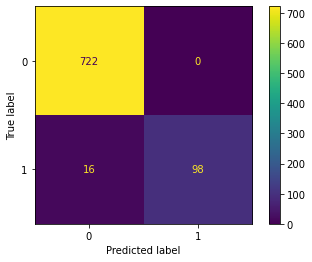

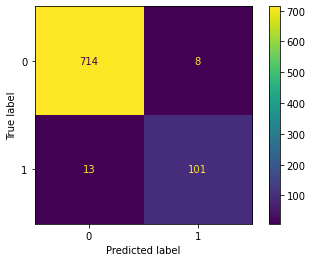

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(
    bg_df, df['Category'], test_size=0.15, random_state=0
)

print("Random Forest")
model = RandomForestClassifier()
result = classifier(X_train,X_test,Y_train,Y_test, model)
plot_confusion_matrix(result, X_test, Y_test)

print("Árvore Decisão")
model = tree.DecisionTreeClassifier()
result = classifier(X_train,X_test,Y_train,Y_test, model)
plot_confusion_matrix(result, X_test, Y_test)

